<img src="../images/cads-logo.png" style="height: 100px;" align=left> 
<img src="../images/sklearn-logo.png" style="height: 100px;" align=right>

# Classification

In classification problems, the task is to decide to which of a predefined, finite set of categories an object belongs. 

# Table of Contents

- [1. k-Nearest Neighbours: Algorithm](#1.-k-Nearest-Neighbours:-Algorithm)
    - [How sensitive is k-NN classification accuracy to the choice of the 'k' parameter?](#How-sensitive-is-k-NN-classification-accuracy-to-the-choice-of-the-'k'-parameter?)
    - [How sensitive is k-NN classification accuracy to the train/test split proportion?](#How-sensitive-is-k-NN-classification-accuracy-to-the-train/test-split-proportion?)
    - [KNN and Distance Functions](#KNN-and-Distance-Functions)
        - [Distance Functions:](#Distance-Functions:)
    - [Pros and Cons of KNN](#Pros-and-Cons-of-KNN)
- [2. Decision Trees: Classification](#2.-Decision-Trees:-Classification)
    - [More on Decision Trees](#More-on-Decision-Trees)
        - [Decision trees and over-fitting](#Decision-trees-and-over-fitting)
- [3. Logistic Regression: Classification](#3.-Logistic-Regression:-Classification)
    - [Logistic Polynomial Regression](#Logistic-Polynomial-Regression)
    - [Regularization in Logistic Regression](#Regularization-in-Logistic-Regression)
    - [Multiclass logistic regression](#Multiclass-logistic-regression)
        - [One versus the rest](#One-versus-the-rest)
        - [Multinomial ](#Multinomial)
            - [Example - Mobile Price Dataset](#Example---Mobile-Price-Dataset)
- [4. Support Vector Machine (SVM): Classification](#4.-Support-Vector-Machine-(SVM):-Classification)
    - [Motivating SVMs](#Motivating-SVMs)
    - [Maximizing the margin:](#Maximizing-the-margin:)
    - [Tuning the SVM: Softening the margin](#Tuning-the-SVM:-Softening-the-margin)
        - [Non-linear kernels](#Non-linear-kernels)
        - [Gaussian Radial Basis Function](#Gaussian-Radial-Basis-Function)
        - [Other kernels](#Other-kernels)
    - [Summary](#Summary)
- [More Readings:](#More-Readings:)

Jamboard (discussion/exercise): https://jamboard.google.com/d/1qJPNeInsSt5ek261YRV2uObq-GVoH8qfurWTtJNkroQ/viewer?f=1

# 1. k-Nearest Neighbours: Algorithm


``k-Nearest Neighbours (KNN)`` falls in the **supervised learning** family of algorithms and it is a famous classification algorithm because it is easy to understand and its good performance however, it is computationally expensive. The KNN algorithm classifies an unlabelled test sample based on the majority of similar samples among the k number of its nearest neighbors. 


## Algorithm

 <img src='../images/knn2.jpg'/>
 
 The basic KNN classifier steps can be described as follows:
- 1. **Training phase:** The training samples and the class labels of these samples are stored. no missing data 
       allowed. No non-numeric features allowed in case of using Euclidian distance. In case of categorical 
       features new distance function should be defined.<br><br>
- 2. **Classification phase:** Each test sample is classified using majority vote of its neighbors by the following
       steps: <br>
       a) Distances from the test sample to all stored training sample are calculated using a specific distance function or similarity measure. <br><br>
       b) The K nearest neighbors of the test sample are selected, where K is a pre-defined small integer. <br><br>
       c) The most repeated class of these K neighbors is assigned to the test sample. In other words, a test sample is assigned to the class c if it is the most frequent class label among the K nearest training samples.

**Import required modules and load data file:**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split

In [3]:
# Load dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class']
dataset = pd.read_csv(url, names=names)

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal-length    150 non-null float64
sepal-width     150 non-null float64
petal-length    150 non-null float64
petal-width     150 non-null float64
class           150 non-null object
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [5]:
dataset.head(10)

,sepal-length,sepal-width,petal-length,petal-width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [6]:
# class distribution
print(dataset.groupby('class').size())

class
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64


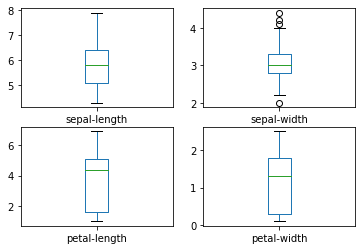

In [6]:
# box and whisker plots
dataset.plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False)
plt.show()

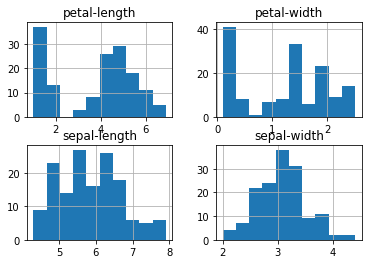

In [7]:
# histograms
dataset.hist()
plt.show()

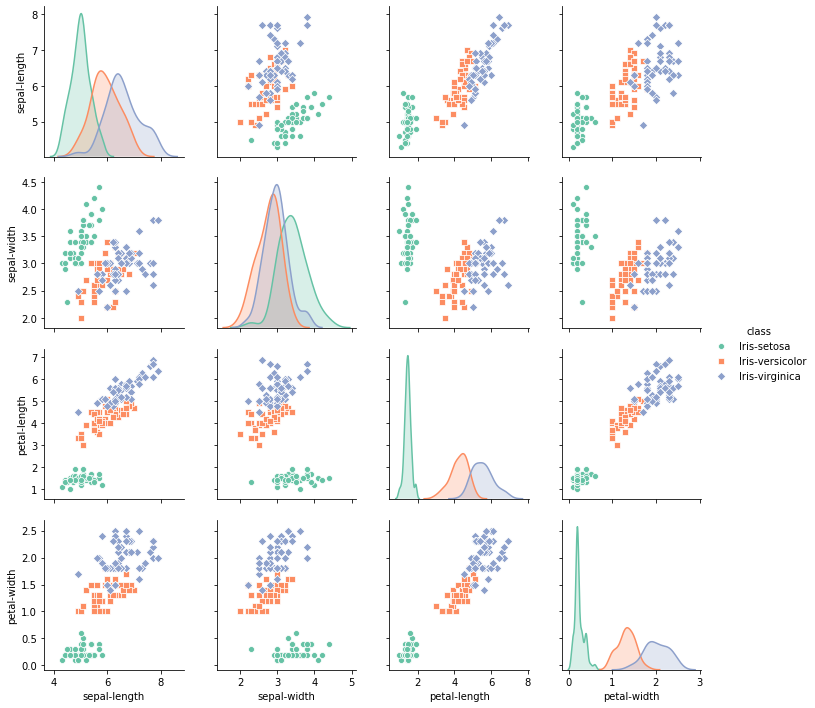

In [8]:
sns.pairplot(dataset, kind="scatter", hue="class", markers=["o", "s", "D"], palette="Set2")
plt.show()

**Create X and y**

In [9]:
# For this example, we use the mass, width, and height features of each fruit instance
X = dataset.drop('class', axis=1)
y = dataset['class']

In [10]:
# all need to be numbers
X.head()

,sepal-length,sepal-width,petal-length,petal-width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [11]:
# all need to be string
y.head()

0    Iris-setosa
1    Iris-setosa
2    Iris-setosa
3    Iris-setosa
4    Iris-setosa
Name: class, dtype: object

**Split data train_test:**

In [12]:
# default is 75% / 25% train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=7)

In [13]:
X_train.head()

,sepal-length,sepal-width,petal-length,petal-width
17,5.1,3.5,1.4,0.3
102,7.1,3.0,5.9,2.1
124,6.7,3.3,5.7,2.1
76,6.8,2.8,4.8,1.4
132,6.4,2.8,5.6,2.2


In [14]:
y_train.head()

17         Iris-setosa
102     Iris-virginica
124     Iris-virginica
76     Iris-versicolor
132     Iris-virginica
Name: class, dtype: object

In [15]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(112, 4)
(112,)
(38, 4)
(38,)


**Create classifier object:**

In [16]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)

**Train the classifier (fit the estimator) using the training data:**

In [17]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

**Use the trained k-NN classifier model to classify new, previously unseen objects:**

In [18]:
# first example: a small flower with sepal-length=2, 
#            sepal-width=3.2, petal-length=1.5, petal-width=0.5
species_prediction = knn.predict([[2, 3.2, 1.5, 0.5]])
print('species name is '+species_prediction[0])


species name is Iris-setosa


In [19]:
# second example: a larger flower with sepal-length=2.5, 
#          sepal-width=5, petal-length=4, petal-width=4
species_prediction = knn.predict([[2.5, 5, 4, 4]])
print('species name is '+species_prediction[0])

species name is Iris-virginica


**Estimate the accuracy of the classifier on future data, using the test data:**

In [20]:
#accuracy
knn.score(X_test, y_test)

0.8947368421052632

In [21]:
# all in one
# 1. Import
# 2. Instantiate
# 3. Fit

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=7)

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

#accuracy
knn.score(X_test, y_test)

0.8947368421052632

### How sensitive is k-NN classification accuracy to the choice of the 'k' parameter?

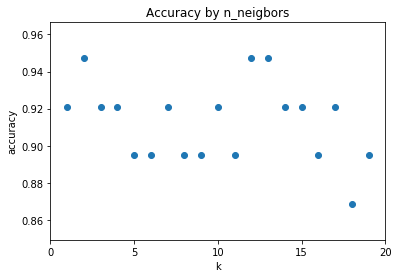

In [22]:
k_range = range(1,20)
scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k, weights='uniform')
    knn.fit(X_train, y_train)
    scores.append(knn.score(X_test, y_test))

plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.title('Accuracy by n_neigbors')
plt.scatter(k_range, scores)
plt.xticks([0,5,10,15,20]);

### How sensitive is k-NN classification accuracy to the train/test split proportion?

Text(0.5, 1.0, 'Accuracy by Split_size')

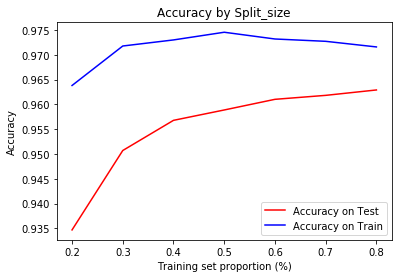

In [23]:
# size of the training set
t = [0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2]

knn = KNeighborsClassifier(n_neighbors = 5)

plt.figure()

scores_test_mean = []
scores_train_mean = []

for s in t:
    scores_test = []
    scores_train = []
    for i in range(1,1000):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1-s)
        knn.fit(X_train, y_train)
        scores_test.append(knn.score(X_test, y_test))
        scores_train.append(knn.score(X_train, y_train))
    scores_test_mean.append(np.mean(scores_test))
    scores_train_mean.append(np.mean(scores_train))

plt.plot(t, scores_test_mean, color='red', label='Accuracy on Test')
plt.plot(t, scores_train_mean, color='blue', label='Accuracy on Train')

plt.xlabel('Training set proportion (%)')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy by Split_size')

### KNN and Distance Functions

KNeighborsClassifier can receive hyperparameters such as:

- n_neighbors : int, optional (default = 5)
    Number of neighbors to use.
    
- p : integer, optional (default = 2)
    Power parameter for the Minkowski metric. When p = 1, this is
    equivalent to using manhattan_distance (l1), and euclidean_distance
    (l2) for p = 2. For arbitrary p, minkowski_distance (l_p) is used.

- metric : string or callable, default 'minkowski'
    the distance metric to use for the tree.  The default metric is
    minkowski, and with p=2 is equivalent to the standard Euclidean
    metric. See the documentation of the DistanceMetric class for a
    list of available metrics.
    
To view to list of all the hyperparameters for KNeighborsClassifier you can run the command "?KNeighborsClassifier" These parameters help the user to change the distance function in KNN algorithm.

In [24]:
?KNeighborsClassifier

#### Distance Functions:

The Minkowski distance of order $p$ between two points $A=(a_1, a_2, ..., a_n) \in \mathbb{R}^n$ and $B=(b_1, b_2, ..., b_n) \in \mathbb{R}^n$ is defined as:$$ d_p(A,B)= \left(\sum_{i=1}^n |a_i-b_i|^p\right)^{1/p} $$

 <img src='../images/minko.png' style="height: 350px;">

To simplify the problem assume there are two datapoints A=[1, 1] and B=[5, 4]. Compute the distance between these two points according to the following definitions of the distance function for p=1 (Manhattan Distance) and p=2 (Euclidian Distance):

In [25]:
import math
A=np.array([1, 1])
B=np.array([5, 4])

# Euclidian
d=math.sqrt((A[0]-B[0])**2+(A[1]-B[1])**2)
print('Euclidian distance between A and B is: ', d)

Euclidian distance between A and B is:  5.0


In [26]:
from sklearn.neighbors import DistanceMetric
dist = DistanceMetric.get_metric('euclidean')
v = [[1, 1], [5, 4]]
d=dist.pairwise(v)
print('Euclidian Distance between A= {}, B= {} is {} '.format([1, 1], [5, 4],d[0,1] ) )

Euclidian Distance between A= [1, 1], B= [5, 4] is 5.0 


**Exercise:**
Write the code to compute to Manhatan distance between A and B using DistanceMetric.get_metric().

In [27]:
# Manhatan
M_dist=DistanceMetric.get_metric('manhattan')
M_d=M_dist.pairwise(v)
print('Manhattan distance between A= {}, B= {} is {} '.format([1, 1], [5, 4],M_d[0,1] ))

Manhattan distance between A= [1, 1], B= [5, 4] is 7.0 


**Exercise:**
Try to classify Iris data using KNN for n_neighbors=7 using both Euclidian and Manhatan distances. Name these models as "E_knn" and "M_knn". Compare their accuracy scores. Which model is better?

In [28]:
# MC

### Pros and Cons of KNN

**Pros**

As you can already tell from the previous section, one of the most attractive features of the K-nearest neighbor algorithm is that is **simple to understand** and **easy to implement**. Furthermore, KNN works just as easily with **multiclass datasets** whereas other algorithms are hardcoded for the binary setting. Finally, as we mentioned earlier, the **non-parametric nature** of KNN gives it an edge in certain settings where the data may be highly “unusual”.


**Cons**

One of the obvious drawbacks of the KNN algorithm is the **computationally expensive** testing phase which is impractical in industry settings. Furthermore, KNN can **suffer from skewed class distributions**. For example, if a certain class is very frequent in the training set, it will tend to dominate the majority voting of the new example (large number = more common). Finally, the accuracy of KNN can be severely degraded with **high-dimension data** because there is little difference between the nearest and farthest neighbor.

### Improvements

With that being said, there are many ways in which the KNN algorithm can be improved.

- A simple and effective way to remedy skewed class distributions is by implementing **weighted voting**. The class of each of the K neighbors is multiplied by a weight proportional to the inverse of the distance from that point to the given test point. This ensures that nearer neighbors contribute more to the final vote than the more distant ones. To use weighted voting, in `KNeighborsClassifier()` set `weights = 'distance'`.

 <img src='../images/WeightedKnn.png'/>


- **Changing the distance metric** for different applications may help improve the accuracy of the algorithm. (i.e. Hamming distance for text classification)
- **Rescaling your data** makes the distance metric more meaningful. For instance, given 2 features $height$ and $weight$, an observation such as $x=[180,7]$ will clearly skew the distance metric in favor of height. One way of fixing this is by column-wise subtracting the mean and dividing by the standard deviation. Scikit-learn’s normalize() method can come in handy.
- **Dimensionality reduction** techniques like PCA should be executed prior to appplying KNN and help make the distance metric more meaningful.
- **Approximate Nearest Neighbor** techniques such as using k-d trees to store the training observations can be leveraged to decrease testing time. Note however that these methods tend to perform poorly in high dimensions (20+).

Imbalanced dataset

<img src='../images/draw 2.png' style="height: 350px;"  align=left>


**Exercise:**

Load the fruits data file and apply KNN to classify fruits.

1. Load Data
2. Examine data
3. Create train-test split
4. Create classifier object
5. Train the classifier (fit the estimator) using the training data for k=5
6. Estimate the accuracy of the classifier on future data, using the test data
7. Compare the accuracy of your model for different values of k on train and test
8. Compare the accuracy of your model for different distance metrics on train and test
9. Examine how scaling the data will impact the accuracy

In [29]:
fruits = pd.read_table('../Data/fruit_data_with_colors.txt')
fruits.head()

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79


In [30]:
#  - 2. Examine data
# your code here

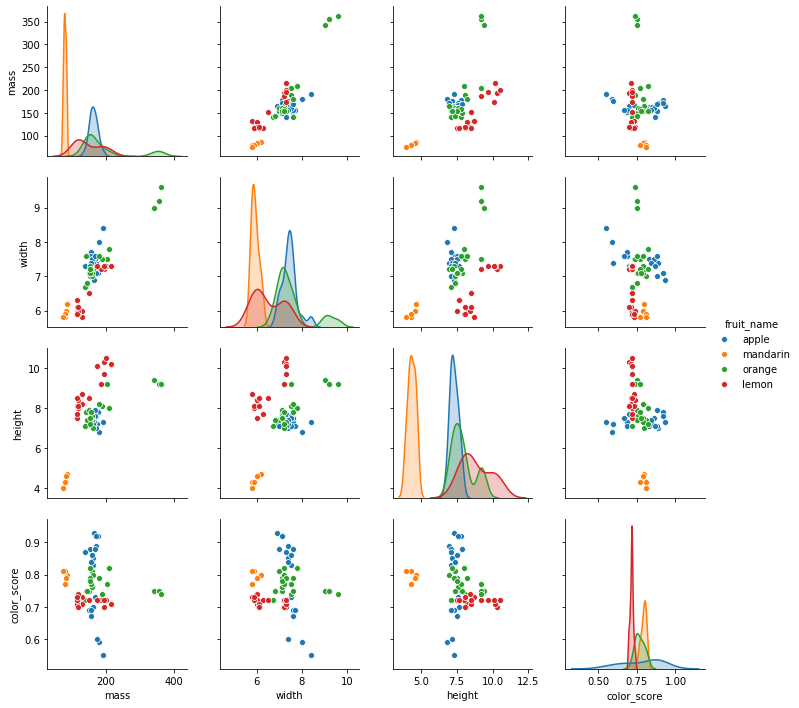

In [31]:
# MC
#  - 2. Examine data
sns.pairplot(fruits[[c for c in fruits.columns if not c == "fruit_label"]], hue='fruit_name');

In [32]:
X = fruits[['mass', 'width', 'height','color_score']]
y = fruits['fruit_label']

In [33]:
X.head()

,mass,width,height,color_score
0,192,8.4,7.3,0.55
1,180,8.0,6.8,0.59
2,176,7.4,7.2,0.60
3,86,6.2,4.7,0.80
4,84,6.0,4.6,0.79


In [34]:
y.head()

0    1
1    1
2    1
3    2
4    2
Name: fruit_label, dtype: int64

In [35]:
#  - 3. Create train-test split
# your code here

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=7)

In [37]:
# your code here

# Train the classifier (fit the estimator) using the training data for k=5
# Estimate the accuracy of the classifier on future data, using the test data
# Compare the accuracy of your model for different values of k on train and test
# Compare the accuracy of your model for different distance metrics on train and test
# Examine how scaling the data will impact the accuracy

In [38]:
# 6. Estimate the accuracy of the classifier on future data, using the test data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

#accuracy
print("Train:",knn.score(X_train, y_train))
print("Test:",knn.score(X_test, y_test))

Train: 0.7954545454545454
Test: 0.5333333333333333


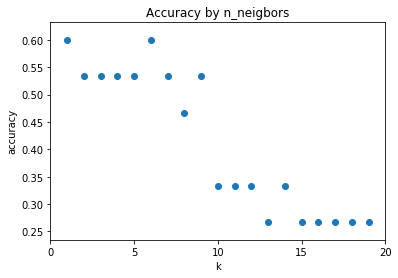

In [39]:
# 7. Compare the accuracy of your model for different values of k on train and test

k_range = range(1,20)
scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k, weights='uniform')
    knn.fit(X_train, y_train)
    scores.append(knn.score(X_test, y_test))

plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.title('Accuracy by n_neigbors')
plt.scatter(k_range, scores)
plt.xticks([0,5,10,15,20]);

In [40]:
# 8. Compare the accuracy of your model for different distance metrics on train and test

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

from sklearn.neighbors import KNeighborsClassifier
knn_M = KNeighborsClassifier(n_neighbors=7, p=1).fit(X_train, y_train)
knn_E = KNeighborsClassifier(n_neighbors=7, p=2).fit(X_train, y_train)

#accuracy
print("Manhattan:",knn_M.score(X_test, y_test))
print("Euclian:",knn_E.score(X_test, y_test))

Manhattan: 0.4666666666666667
Euclian: 0.5333333333333333


In [41]:
# Examine how scaling the data will impact the accuracy

#min max scale transform
from sklearn import preprocessing
X_minmax = preprocessing.MinMaxScaler().fit_transform(X)
X_minmax

X_train, X_test, y_train, y_test = train_test_split(X_minmax, y, random_state=0)
knn_scale = KNeighborsClassifier(n_neighbors=5)
knn_scale.fit(X_train, y_train)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

#accuracy
print("Test score:",knn.score(X_test, y_test))
print("Test score for scaled:",knn_scale.score(X_test, y_test))

Test score: 0.5333333333333333
Test score for scaled: 0.5333333333333333


Data leakage already
- if split first then scale, the model will learn the distribution of the whole data including the test data

<img src='../images/003.png' style="height: 300px;"  align=left>

In [42]:
# MC
# 9. Examine how scaling the data will impact the accuracy

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Scale after split

#min max scale transform
from sklearn import preprocessing
scaler = preprocessing.MinMaxScaler().fit(X_train)
X_train_scale = scaler.transform(X_train)
X_test_scale = scaler.transform(X_test)

knn_scale = KNeighborsClassifier(n_neighbors=5)
knn_scale.fit(X_train_scale, y_train)


#accuracy
print("Train data:",knn.score(X_train, y_train))
print("Test data:",knn.score(X_test, y_test))
print("Train data for scaled:",knn_scale.score(X_train_scale, y_train))
print("Test data for scaled:",knn_scale.score(X_test_scale, y_test))

Train data: 0.7954545454545454
Test data: 0.5333333333333333
Train data for scaled: 0.9545454545454546
Test data for scaled: 1.0


In [43]:
# improve the accuracy a lot

# 2. Decision Trees: Classification 

Decision trees are widely used models for classification and regressions. Essentially, they learn a hierarchy of if/else questions, leading to an action.  

These questions are similar to the questions you might ask in a **game of 20 Questions**. Imagine you want to distinguish between the following four animals: 

**bears, hawks, penguins, and dolphins**.

<img src='../images/DecisionTree.png'>

Your goal is to get to the right answer by asking as few if/else questions as possible. You might start off by asking whether the animal has feathers, a question that narrows down your possible animals to just two. If the answer is "yes", you can ask another question that could help you distinguish between hawks and penguins. For example, you could ask whether the animal can fly. If the animal doesn’t have feathers, your possible animal choices are dolphins and bears, and you will need to ask a question to distinguish between these two animals—for example, asking whether the animal has finns. This series of questions can be expressed as a decision tree.

Machine learning speaking, we want to build a model to distinguish between these four classes of animals using three features (has feathers, can fly, has fins). But instead of building these models by hand, we can learn them from data using supervised learning.

### Building decision trees

Usually, data does not come in the form of binary yes/no features, but is instead represented by continuous features. So, we expect the "questions" to be in "threshold"-like form, such as "Is feature *i* larger than value *a*?" To build a tree, the algorithm has to search over all possible conditions and finds the one that is most informative about the target variable. Using the two moons toy dataset, let's see how it's done.

![](../images/decisiontrees-step1.png)

First, splitting the dataset vertically at x[1]=0.0596 yields the most information; it best separates the points in class 1 from the points in class 2. The top node, also called the root, represents the whole dataset, consisting of 75 points belonging to class 0 and 75 points belonging to class 1. The split is done by testing whether x[1] <= 0.0596, indicated by a black line. If the test is true, a point is assigned to the left node, which contains 2 points belonging to class 0 and 32 points belonging to class 1. Otherwise the point is assigned to the right node, which contains 48 points belonging to class 0 and 18 points belonging to class 1. Even though the first split did a good job of separating the two classes, the bottom region still contains points belonging to class 0, and the top region still contains points belonging to class 1.

![](../images/decisiontrees-step2.png)

Next, we repeat the process of looking for the best (or the most informative) way to split further in both regions. This is depth 2 of the decision tree. This recursive process yields a binary tree of decisions, with each node containing a
test condition. We can view this algorithm as building a hierarchical partition. The recursive partitioning of the data is repeated until each region in the partition (each leaf in the decision tree) only contains a single target value (a single class or a single regression value). A leaf of the tree that contains data points that all share the same target value is called *pure*. The final partitioning for this dataset is as follows:

![](../images/decisiontrees-finalstep.png)

**Predicting the target class or value of new data point:**

A prediction on a new data point is made by checking which region of the partition of the feature space the point lies in, and then predicting the target class with the majority (or the single target in the case of *pure* leaves) in that region. The region can be found by traversing the tree from the root and going left or right depending on whether the test condition is fulfilled or not.

It is also possible to use decision trees for regression tasks, using exactly the same technique. To make a prediction, we traverse the tree based on the tests in each node and find the leaf the new data point falls into. The output for this data point is the mean target value of the training points in this leaf.

In [44]:
# Load dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class']
dataset = pd.read_csv(url, names=names)

In [45]:
X = dataset.drop('class', axis=1)
y = dataset['class']

In [46]:
X.head()

,sepal-length,sepal-width,petal-length,petal-width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [47]:
y.head()

0    Iris-setosa
1    Iris-setosa
2    Iris-setosa
3    Iris-setosa
4    Iris-setosa
Name: class, dtype: object

In [48]:
from sklearn.tree import DecisionTreeClassifier
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=7)

tree = DecisionTreeClassifier(max_depth=2)
tree.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

Accuracy on training set: 0.982
Accuracy on test set: 0.895


Question: Find out what's the ideal depth level that we can strike a balance between fitting well to the training data, and generalizing well to test data.

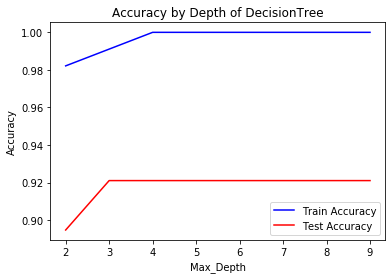

In [49]:
train_acc = []
test_acc = []

for i in range(2,10):
    tree1 = DecisionTreeClassifier(max_depth=i, random_state=0)
    tree1.fit(X_train, y_train)

    train_acc.append(tree1.score(X_train, y_train))
    test_acc.append(tree1.score(X_test, y_test))
    
plt.plot(range (2,10),train_acc,'b-', label='Train Accuracy')
plt.plot(range (2,10),test_acc,'r-', label='Test Accuracy')
plt.xlabel('Max_Depth')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy by Depth of DecisionTree')
plt.show()

**Exercise:**
Create, fit, and evaluate a desicion tree classifier on our dataset for max_depth=3. Compare it with the previous model "tree".

In [50]:
# your code here

In [51]:
feature_names = names[:4]
feature_names

['sepal-length', 'sepal-width', 'petal-length', 'petal-width']

In [52]:
y.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [53]:
target_names = list(y.unique())

In [54]:
from sklearn.tree import DecisionTreeClassifier
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=7)

tree = DecisionTreeClassifier(max_depth=3)
tree.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

Accuracy on training set: 0.991
Accuracy on test set: 0.921


### More on Decision Trees

**Terminology**

1. **Root Node:** It represents entire population or sample and this further gets divided into two or more homogeneous sets.
2. **Splitting:** It is a process of dividing a node into two or more sub-nodes.
3. **Decision Node:** When a sub-node splits into further sub-nodes, then it is called decision node.
4. **Leaf/ Terminal Node:** Nodes do not split is called Leaf or Terminal node.
5. **Pruning:** When we remove sub-nodes of a decision node, this process is called pruning. You can say opposite process of splitting.
6. **Branch / Sub-Tree:** A sub section of entire tree is called branch or sub-tree.
7. **Parent and Child Node:** A node, which is divided into sub-nodes is called parent node of sub-nodes where as sub-nodes are the child of parent node.

#### Decision trees and over-fitting

Such over-fitting turns out to be a general property of decision trees: it is very easy to go too deep in the tree, and thus to fit details of the particular data rather than the overall properties of the distributions they are drawn from.
Another way to see this over-fitting is to look at models trained on different subsets of the data—for example, in this figure we train two different trees, each on half of the original data:

Image:
![](../images/decision-tree-overfitting.png)


It is clear that in some places, the two trees produce consistent results (e.g., in the four corners), while in other places, the two trees give very different classifications (e.g., in the regions between any two clusters).
The key observation is that the inconsistencies tend to happen where the classification is less certain, and thus by using information from *both* of these trees, we might come up with a better result!

Just as using information from two trees improves our results, we might expect that using information from many trees would improve our results even further.

# 3. Logistic Regression: Classification

## Can we use Linear regression to predict a class?

In a classification problem the values $y$ that we want to predict take on only a small number of discrete values

### Binary Classification:

For now, we will focus on the binary classification problem in which $y$
can take on only two values, 0 and 1.

We will see later how to use a binary classifiers for the multiple-class case.

For instance, if we are trying to build a spam classifier for email, then $x$ represents a mail (frequency of each word for instance), and $y$ may be 1 if it is a piece of spam mail, and 0 otherwise. 0 is also called the
negative class, and 1 the positive class, and they are sometimes also denoted by the symbols “-”
and “+”. 


### Linear Regression limitation:**

In linear regression, the prediction is given by

$$\hat{y} = \beta_0 + \beta_1 x_1 + \cdots + \beta_m x_m$$

$$\hat{y} = \sum_{j=0}^{m} \beta_i x_i$$

Then $\hat{y}$ takes values in $\mathbb{R}$.

This is not what we want because in binary classification we have: $y \in \{0, 1\}$

### The Sigmoid function:

If we still want to use a linear combination of the input features (the $x_i$'s) to predict $y$, we need a function that takes input in $\mathbb{R}$ and returns values in $[0, 1]$.

The sigmoid function:
$$
\begin{align*}
  \phi \colon \mathbb{R} & \to ]0, 1[\\
  z &\mapsto \frac{1}{1+e^{-z}}
\end{align*}
$$

**Exercise:**

1. What are the value of
    - $\phi(0)$, 
    - $\lim_{z\to+\infty}\phi(z)$
    - $\lim_{z\to-\infty}\phi(z)$
1. Plot the function $\phi(z)$ for $z\in [-7, 7]$.

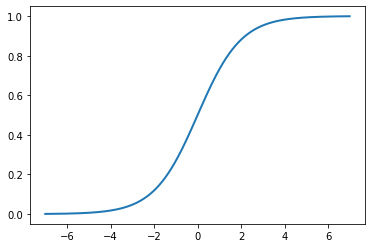

In [55]:
a=np.arange(-7, 7, 0.01)
b=1/(1+np.exp(-a))
plt.plot(a,b, lw=2)
plt.show()

Therefore, if for x as a datapoint instead of $\hat{y}$ we calsulate $\phi(\hat{y})$ this will be the estimate probability of y=1 for x. For example, if for x, $\phi(\hat{y})=\sum_{j=0}^{m} \beta_i x_i=0.65$ we interpret that the probability of x being in class 1 is 0.65.

In [65]:
# Load dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class']
dataset = pd.read_csv(url, names=names)

In [66]:
X = dataset.drop('class', axis=1)
y = dataset[['class']]

In [67]:
y.head()

,class
0,Iris-setosa
1,Iris-setosa
2,Iris-setosa
3,Iris-setosa
4,Iris-setosa


In [68]:
X.head()

,sepal-length,sepal-width,petal-length,petal-width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [69]:
# Make out dataset as binary class
n_X = X.iloc[:, :2]
n_X.head()

,sepal-length,sepal-width
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6


In [70]:
n_X.loc[:,'class'] = np.where(y=='Iris-setosa', 1,0)

In [71]:
n_X.head()

,sepal-length,sepal-width,class
0,5.1,3.5,1
1,4.9,3.0,1
2,4.7,3.2,1
3,4.6,3.1,1
4,5.0,3.6,1


In [72]:
n_y = n_X.loc[:,'class']
n_data = n_X
n_X = n_X.drop('class', axis=1)

In [73]:
n_X_train, n_X_test, n_y_train, n_y_test = train_test_split(n_X, n_y, 
                                                                test_size = .2,random_state=7)


In [74]:
n_y_train.head()

126    0
79     0
22     1
139    0
74     0
Name: class, dtype: int32

In [87]:
from sklearn.linear_model import LogisticRegression
logr = LogisticRegression()
logr.fit(n_X_train, n_y_train)
logr_y_pred = logr.predict(n_X_test)
print('Accuracy: ',logr.score(n_X_test, n_y_test))  

Accuracy:  0.9666666666666667


D:\Users\Faiz\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [86]:
logr.predict_proba(n_X_test)

array([[0.84114293, 0.15885707],
       [0.62196527, 0.37803473],
       [0.08659686, 0.91340314],
       [0.72420998, 0.27579002],
       [0.7769127 , 0.2230873 ],
       [0.74652578, 0.25347422],
       [0.97393443, 0.02606557],
       [0.89251353, 0.10748647],
       [0.08019414, 0.91980586],
       [0.8877663 , 0.1122337 ],
       [0.97172048, 0.02827952],
       [0.59038286, 0.40961714],
       [0.01490795, 0.98509205],
       [0.91708003, 0.08291997],
       [0.18173669, 0.81826331],
       [0.71079878, 0.28920122],
       [0.9957461 , 0.0042539 ],
       [0.92069811, 0.07930189],
       [0.03649589, 0.96350411],
       [0.25832257, 0.74167743],
       [0.92983908, 0.07016092],
       [0.96220256, 0.03779744],
       [0.92539721, 0.07460279],
       [0.99310807, 0.00689193],
       [0.99103826, 0.00896174],
       [0.86995132, 0.13004868],
       [0.94001588, 0.05998412],
       [0.95409285, 0.04590715],
       [0.92983908, 0.07016092],
       [0.95903405, 0.04096595]])

In [76]:
beta0 = logr.intercept_[0]
beta1 = logr.coef_[0][0]
beta2 = logr.coef_[0][1]

print('beta0 = {}, beta1 = {}, beta2 = {} '.format(beta0, beta1, beta2))

beta0 = 0.6134231724568254, beta1 = -2.3377170549142803, beta2 = 3.8374502419837846 


In [78]:
x1 = np.linspace(min(n_X.loc[:,"sepal-length"]) - 0.1, max(n_X.loc[:,"sepal-length"]) + 0.1)

In [79]:
x1

array([4.2       , 4.27755102, 4.35510204, 4.43265306, 4.51020408,
       4.5877551 , 4.66530612, 4.74285714, 4.82040816, 4.89795918,
       4.9755102 , 5.05306122, 5.13061224, 5.20816327, 5.28571429,
       5.36326531, 5.44081633, 5.51836735, 5.59591837, 5.67346939,
       5.75102041, 5.82857143, 5.90612245, 5.98367347, 6.06122449,
       6.13877551, 6.21632653, 6.29387755, 6.37142857, 6.44897959,
       6.52653061, 6.60408163, 6.68163265, 6.75918367, 6.83673469,
       6.91428571, 6.99183673, 7.06938776, 7.14693878, 7.2244898 ,
       7.30204082, 7.37959184, 7.45714286, 7.53469388, 7.6122449 ,
       7.68979592, 7.76734694, 7.84489796, 7.92244898, 8.        ])

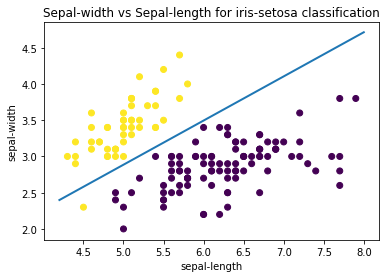

In [80]:
plt.scatter( n_data.loc[:,"sepal-length"], n_data.loc[:,"sepal-width"], 
           c = n_data.loc[:,'class']) 
x1 = np.linspace(min(n_X.loc[:,"sepal-length"])-0.1, max(n_X.loc[:,"sepal-length"])+0.1)
plt.plot(x1, -beta0/beta2 - beta1/beta2 *x1, lw=2)
plt.xlabel('sepal-length')
plt.ylabel('sepal-width')
plt.title('Sepal-width vs Sepal-length for iris-setosa classification')

plt.show()

## Logistic Polynomial Regression

**Example:**

Yellow is Class 1
Purple is Class 0


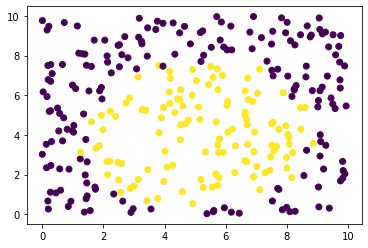

In [88]:
def generate_data(n=50, a=10):
    rng = np.random.RandomState(1)
    X = 10*rng.rand(n, 2)
    Y = np.zeros(n)
    for i, x in enumerate(X):
        if (x[0]-5)**2 + (x[1]-4)**2 + 4*rng.rand()< 16:
            Y[i] = 1
    return X, Y

print("Yellow is Class 1")
print("Purple is Class 0")

X, Y = generate_data(300, 5)
plt.scatter(X[:,0], X[:,1], c=Y)
plt.show();

In [89]:
print("X:", X.shape)
print("Y:", Y.shape)

X: (300, 2)
Y: (300,)


In [97]:
# solver = 'liblinear' - > fit_intercept
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(fit_intercept=True, solver = 'liblinear')
model = model.fit(X, Y)
model.score(X,Y)

0.59

In [99]:
# Using knn
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()
model = model.fit(X, Y)
model.score(X,Y)

0.9533333333333334

In [108]:
# Using Decision tree
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(max_depth=2)
model = model.fit(X, Y)
model.score(X,Y)

0.79

Actuals


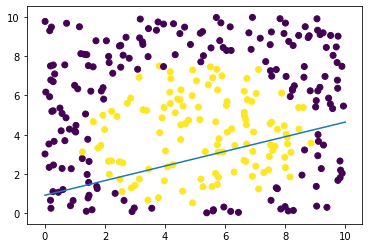

Predicted


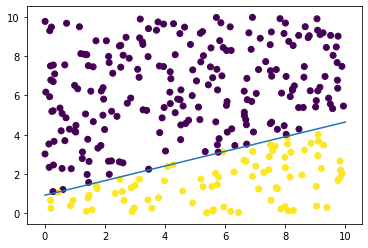

In [91]:
beta0 = model.intercept_[0]
beta1 = model.coef_[0][0]
beta2 = model.coef_[0][1]

x1 = np.linspace(0, 10)

# actuals
print("Actuals")
plt.plot(x1, -beta0/beta2 - beta1/beta2 *x1) # decision boundary 
plt.scatter(X[:,0], X[:,1], c=Y)
plt.show();

# predicted
print("Predicted")
ypred = model.predict(X)
plt.plot(x1, -beta0/beta2 - beta1/beta2 *x1) # decision boundary 
plt.scatter(X[:,0], X[:,1], c=ypred)
plt.show();

In [102]:
### Make it into polynomial###
##############################

from sklearn.preprocessing import PolynomialFeatures

#[1, a, b, a^2, ab, b^2]
poly = PolynomialFeatures(degree=2, include_bias=False)
poly.fit(X)
x_poly = poly.fit_transform(X)

In [93]:
X[1]

array([1.14374817e-03, 3.02332573e+00])

In [94]:
x_poly[1]

array([1.14374817e-03, 3.02332573e+00, 1.30815988e-06, 3.45792328e-03,
       9.14049845e+00])

In [103]:
from sklearn.linear_model import LogisticRegression
model_poly = LogisticRegression(fit_intercept=True, solver = 'liblinear')
model_poly = model_poly.fit(x_poly, Y)

# Decision boundry: beta0 + beta1 * x1 + beta2 * x2 + beta3 * x1^2 + beta4 * x1 * x2 + beta5 * x2^2
beta0_poly = model_poly.intercept_[0]
beta1_poly = model_poly.coef_[0][0]
beta2_poly = model_poly.coef_[0][1]
beta3_poly = model_poly.coef_[0][2]
beta4_poly = model_poly.coef_[0][3]
beta5_poly = model_poly.coef_[0][4]
print(beta0_poly, beta1_poly, beta2_poly, beta3_poly, beta4_poly, beta5_poly)



-4.760063591619898 2.4368805475025637 1.657042174633227 -0.30848776864852206 0.15572515849067073 -0.32336681240634857


Actuals


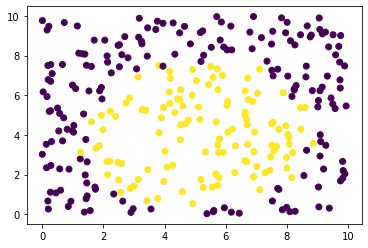

Predicted


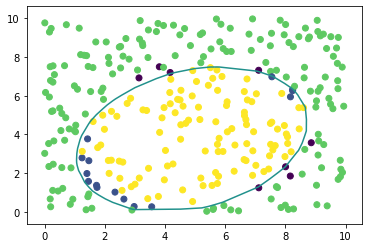

In [105]:
x1 = np.linspace(0, 10)

# actuals
print("Actuals")
plt.scatter(X[:,0], X[:,1], c=Y)
plt.show();

# predicted
print("Predicted")
ypred = model_poly.predict(x_poly)
v = Y==ypred

def f(x,y):
    return beta0_poly + beta1_poly * x + beta2_poly * y + beta3_poly * (x**2) + beta4_poly * (x * y) + beta5_poly * (y**2)

plt.tricontour(X[:,0], X[:,1], f(X[:,0], X[:,1]), levels = 0)


plt.scatter(X[:,0], X[:,1], c = 3*v + ypred)

plt.show();


## Regularization in Logistic Regression

**Example:**

-12.69330105625687 5.045638937311784 3.8189024164742498 -0.54633201333406 0.11721905148158145 -0.5611713926223997
Actuals


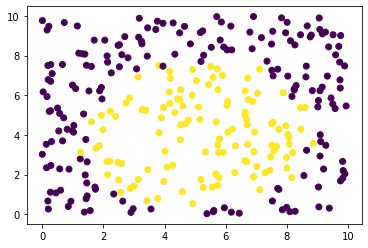

Predicted


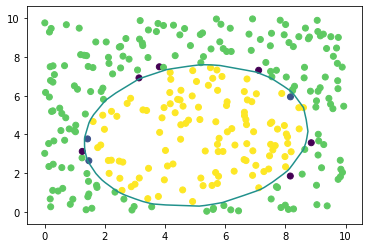

In [106]:
# penalty = 'l1', C = 1
model_poly = LogisticRegression(fit_intercept=True, solver = 'liblinear', penalty = 'l1', C = 1)
model_poly = model_poly.fit(x_poly, Y)

# Decision boundry: beta0 + beta1 * x1 + beta2 * x2 + beta3 * x1^2 + beta4 * x1 * x2 + beta5 * x2^2
beta0_poly = model_poly.intercept_[0]
beta1_poly = model_poly.coef_[0][0]
beta2_poly = model_poly.coef_[0][1]
beta3_poly = model_poly.coef_[0][2]
beta4_poly = model_poly.coef_[0][3]
beta5_poly = model_poly.coef_[0][4]
print(beta0_poly, beta1_poly, beta2_poly, beta3_poly, beta4_poly, beta5_poly)
x1 = np.linspace(0, 10)

# actuals
print("Actuals")
plt.scatter(X[:,0], X[:,1], c=Y)
plt.show();

# predicted
print("Predicted")
ypred = model_poly.predict(x_poly)
v = Y==ypred
def f(x,y):
    return beta0_poly + beta1_poly * x + beta2_poly * y + beta3_poly * (x**2) + beta4_poly * (x * y) + beta5_poly * (y**2)

plt.tricontour(X[:,0], X[:,1], f(X[:,0], X[:,1]), levels = 0)


plt.scatter(X[:,0], X[:,1], c = 3*v + ypred)

plt.show();

**Exercise:**

Explore the impact of hyperparameters, `C` and `penalty` on the decision boundry and accuracy of the above Logistic Regression model.

In [ ]:
# Your code here

-4.760063591619898 2.4368805475025637 1.657042174633227 -0.30848776864852206 0.15572515849067073 -0.32336681240634857
Actuals


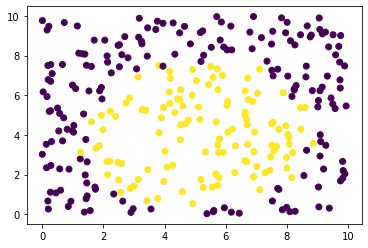

Predicted


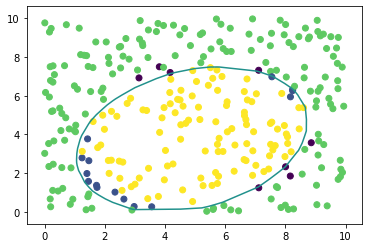

In [114]:
# penalty = 'l1', C = 1
model_poly = LogisticRegression(fit_intercept=True, solver = 'liblinear', penalty = 'l2', C = 1)
model_poly = model_poly.fit(x_poly, Y)

# Decision boundry: beta0 + beta1 * x1 + beta2 * x2 + beta3 * x1^2 + beta4 * x1 * x2 + beta5 * x2^2
beta0_poly = model_poly.intercept_[0]
beta1_poly = model_poly.coef_[0][0]
beta2_poly = model_poly.coef_[0][1]
beta3_poly = model_poly.coef_[0][2]
beta4_poly = model_poly.coef_[0][3]
beta5_poly = model_poly.coef_[0][4]
print(beta0_poly, beta1_poly, beta2_poly, beta3_poly, beta4_poly, beta5_poly)
x1 = np.linspace(0, 10)

# actuals
print("Actuals")
plt.scatter(X[:,0], X[:,1], c=Y)
plt.show();

# predicted
print("Predicted")
ypred = model_poly.predict(x_poly)
v = Y==ypred
def f(x,y):
    return beta0_poly + beta1_poly * x + beta2_poly * y + beta3_poly * (x**2) + beta4_poly * (x * y) + beta5_poly * (y**2)

plt.tricontour(X[:,0], X[:,1], f(X[:,0], X[:,1]), levels = 0)


plt.scatter(X[:,0], X[:,1], c = 3*v + ypred)

plt.show();

## Multiclass logistic regression

Multiclass logistic regression is the generalization of logistic regression algorithm. If the logistic regression algorithm used for the multi-classification task (we have more than two possible discrete outcomes), then the same logistic regression algorithm called as the multiclass logistic regression.

<img src="../images/One_vs_rest1.png" style="height: 200px;" >

To implement multiclass classification, there are 2 approaches: **One-versus-the-rest** and **multinomial**. 


### One versus the rest

In this approach, one binary classifier is trained for each class. At prediction time **class with the highest probability** will be selected.


<img src="../images/One_vs_rest2.png" style="height: 300px;" >


### Multinomial 

Multinomial, also called **Softmax regression**, generates $k$ (for $k$ classes) **probabilities that sum to $1$.** 

The [softmax function](https://en.wikipedia.org/wiki/Softmax_function) is a generalization of the logistic function that  "squashes" a k-dimensional vector z of arbitrary real values to a K-dimensional vector of real values in the range [0, 1] that add up to 1.

<img src="../images/softmax.png" style="height: 500px;" >

### Example - Mobile Price Dataset

Let's see how the Multinomial logistic regression model can be used for Mobile Price dataset.

In [115]:
# Importing data

mobile = pd.read_csv('../Data/mobile_price_train.csv')

mobile.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [116]:

# Quick summary of each column

mobile.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
battery_power    2000 non-null int64
blue             2000 non-null int64
clock_speed      2000 non-null float64
dual_sim         2000 non-null int64
fc               2000 non-null int64
four_g           2000 non-null int64
int_memory       2000 non-null int64
m_dep            2000 non-null float64
mobile_wt        2000 non-null int64
n_cores          2000 non-null int64
pc               2000 non-null int64
px_height        2000 non-null int64
px_width         2000 non-null int64
ram              2000 non-null int64
sc_h             2000 non-null int64
sc_w             2000 non-null int64
talk_time        2000 non-null int64
three_g          2000 non-null int64
touch_screen     2000 non-null int64
wifi             2000 non-null int64
price_range      2000 non-null int64
dtypes: float64(2), int64(19)
memory usage: 328.2 KB


In [117]:
# Checking the distribution of target classes

mobile['price_range'].value_counts()

3    500
2    500
1    500
0    500
Name: price_range, dtype: int64

There are 4 price ranges 0, 1, 2 and 3 corresponding to the cheapest price range (0) to the most expensive price range (3)


In [118]:
# Separating target from features

X = mobile.drop('price_range', axis = 1)
y = mobile['price_range']

In [119]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state = 10, test_size = 0.2)

# Scaling the data because the columns are in different ranges
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
Xtrain_scaled = scaler.fit_transform(Xtrain)
Xtest_scaled = scaler.transform(Xtest)

In [124]:
logreg = LogisticRegression(random_state = 42, multi_class = 'multinomial', solver = 'newton-cg')
logreg.fit(Xtrain_scaled, ytrain)
logreg_pred = logreg.predict(Xtest_scaled)

logreg_pred[:10]

array([3, 3, 1, 3, 1, 3, 3, 2, 1, 3], dtype=int64)

In [121]:
logreg_prob = logreg.predict_proba(Xtest_scaled)
logreg_prob[:10]

array([[1.13142714e-05, 6.25072048e-03, 1.17971749e-01, 8.75766217e-01],
       [2.45823394e-05, 1.14558050e-02, 1.91697263e-01, 7.96822350e-01],
       [1.97330157e-02, 4.60888589e-01, 4.52553919e-01, 6.68244767e-02],
       [3.03045009e-06, 2.93324923e-03, 1.01228174e-01, 8.95835547e-01],
       [1.59113868e-01, 5.59256224e-01, 2.73893982e-01, 7.73592543e-03],
       [1.94521020e-07, 8.07925015e-04, 2.59903036e-02, 9.73201577e-01],
       [5.62978135e-05, 2.12048708e-02, 2.03131429e-01, 7.75607403e-01],
       [1.63836484e-04, 3.98767745e-02, 4.84860921e-01, 4.75098468e-01],
       [2.89571247e-01, 5.20806164e-01, 1.87160286e-01, 2.46230318e-03],
       [1.20075735e-07, 5.41737319e-04, 2.94054002e-02, 9.70052742e-01]])

In [122]:
logreg.score(Xtest_scaled, ytest)

0.915

## Exercise - breast_cancer
For this exercise, you will be using the Breast Cancer Wisconsin (Diagnostic) Database that is available from sklearn datasets to create a  logistic regression classifier to predict the cancer status.

**breast_cancer dataset columns name:**

    ['mean radius', 'mean texture', 'mean perimeter', 'mean area',
    'mean smoothness', 'mean compactness', 'mean concavity',
    'mean concave points', 'mean symmetry', 'mean fractal dimension',
    'radius error', 'texture error', 'perimeter error', 'area error',
    'smoothness error', 'compactness error', 'concavity error',
    'concave points error', 'symmetry error', 'fractal dimension error',
    'worst radius', 'worst texture', 'worst perimeter', 'worst area',
    'worst smoothness', 'worst compactness', 'worst concavity',
    'worst concave points', 'worst symmetry', 'worst fractal dimension',
    'target']
    
    
You may find out about the dataset from the description given below.

In [125]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()

print(cancer.DESCR) # Print the data set description

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, f

The object returned by `load_breast_cancer()` is a scikit-learn Bunch object, which is similar to a dictionary.


In [126]:
cancer.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

### Question 0 

How many features does the breast cancer dataset have?

In [1]:
### Your code here

In [135]:
len(cancer.feature_names)

30

### Question 1

Convert the sklearn.dataset `cancer` to a DataFrame.

In [2]:
### Your code here


In [149]:
df = pd.DataFrame(cancer.data,columns = cancer.feature_names)
df["Target"] = cancer.target
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,Target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


### Question 2
What is the class distribution? (i.e. how many instances of `malignant` (badkhim /meˈlignant/) and how many `benign` (khosh khim /benain/) ?)

In [3]:
### Your code here

In [153]:
df.groupby("Target").size()

Target
0    212
1    357
dtype: int64

### Question 3
Split the DataFrame into `X` (the data) and `y` (the labels).

In [4]:
### Your code here

In [159]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]
print(X.shape)
print(y.shape)

(569, 30)
(569,)


In [157]:
# MC
X = df.drop("Target",axis = 1)
y = df["Target"]

### Question 4
Using `train_test_split`, split `X` and `y` into training and test sets `(X_train, X_test, y_train, and y_test)`.

Set the random number generator state to 0 using **`random_state = 0`**

In [5]:
### Your code here

In [164]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state = 0)

### Question 5
Using `LogisticRegression`, fit your model with `X_train`, `y_train`.

In [6]:
### Your code here

In [191]:
# Scaling the data because the columns are in different ranges
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
Xtrain_scaled = scaler.fit_transform(Xtrain)
Xtest_scaled = scaler.transform(Xtest)

logreg_s = LogisticRegression(random_state = 0, multi_class = 'multinomial', solver = 'newton-cg')
logreg_s.fit(Xtrain_scaled, ytrain)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=0, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)

In [192]:
logreg = LogisticRegression(random_state = 0, multi_class = 'multinomial', solver = 'newton-cg')
logreg.fit(Xtrain, ytrain)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=0, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)

### Question 6
Using your logistic regression model, predict the class label.

In [193]:
### Your code here

In [194]:
logreg_s.predict(Xtrain)
logreg.predict(Xtrain)

array([1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0,

### Question 7
Predict the class labels for the test set `X_test`.

In [195]:
### Your code here

In [196]:
logreg_pred_s = logreg_s.predict(Xtest)
logreg_pred = logreg.predict(Xtest)
logreg_pred

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0])

In [197]:
logreg.predict_proba(Xtest)

array([[9.95777358e-01, 4.22264182e-03],
       [3.10483999e-02, 9.68951600e-01],
       [1.34459655e-03, 9.98655403e-01],
       [1.51437851e-01, 8.48562149e-01],
       [1.88304587e-05, 9.99981170e-01],
       [8.30249074e-04, 9.99169751e-01],
       [2.84507955e-03, 9.97154920e-01],
       [5.20799056e-04, 9.99479201e-01],
       [2.10748093e-04, 9.99789252e-01],
       [1.16500121e-05, 9.99988350e-01],
       [6.69476829e-01, 3.30523171e-01],
       [2.00315476e-01, 7.99684524e-01],
       [1.30571333e-04, 9.99869429e-01],
       [7.09439459e-01, 2.90560541e-01],
       [3.56543300e-01, 6.43456700e-01],
       [9.93002206e-01, 6.99779370e-03],
       [8.13950242e-04, 9.99186050e-01],
       [9.99999939e-01, 6.06100846e-08],
       [9.96377830e-01, 3.62216960e-03],
       [1.00000000e+00, 6.40311221e-11],
       [9.99940473e-01, 5.95274701e-05],
       [9.66822594e-01, 3.31774056e-02],
       [2.05743352e-03, 9.97942566e-01],
       [4.46191041e-03, 9.95538090e-01],
       [9.217100

### Question 8
Find the score (mean accuracy) of your logistic regression model using `X_test` and `y_test`.


In [198]:
### Your code here

In [199]:
print("Not scaled accuracy:",logreg.score(Xtest,ytest))
print("Scaled acuracy:",logreg_s.score(Xtest_scaled,ytest))

Not scaled accuracy: 0.951048951048951
Scaled acuracy: 0.965034965034965


In [200]:
# MC: alternative ways
from sklearn.metrics import accuracy_score
accuracy_score(ytest,logreg_pred)

0.951048951048951

# 4. Support Vector Machine (SVM): Classification

Support vector machines (SVMs) are a particularly powerful and flexible class of supervised algorithms for both classification and regression. In this section, we will develop the intuition behind support vector machines and their use in classification problems.

## Motivating SVMs
Given two possible categories for data points to fall into, we can approach the classification task in one of two ways:
- *Generative algorithms*, calculate the probability of a data point belonging to a certain class.
- *Discriminative algorithms*, on the other hand, identify the optimal boundary between classes.

SVM is an example of a discriminative algorithm. While it may not seem as intuitively useful, it has three useful advantages over generative models.

1. Discriminative models typically outperform generative models.
2. Discriminative models are more robust towards outliers than generative models.

Consider the following toy data set.

In [201]:
from mpl_toolkits.mplot3d import Axes3D
import sklearn.svm
import sklearn.datasets.samples_generator
import sklearn.model_selection
from scipy import stats


sns.set(style="dark")

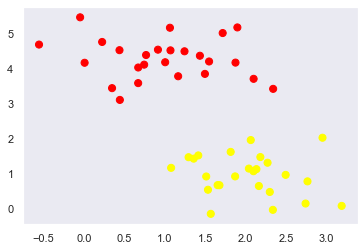

In [204]:
# generate random data

from sklearn.datasets.samples_generator import make_blobs


X, y = sklearn.datasets.samples_generator.make_blobs(
    n_samples=50, centers=2, random_state=0, cluster_std=0.60)
plt.scatter(X[:, 0], X[:, 1], c=np.array(["red", "yellow"])[y], s=50);

Drawing a separating line between these two classes is easy eough, but which line should we choose?

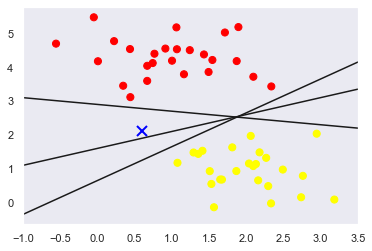

In [203]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plt.plot([0.6], [2.1], 'x', color='blue', markeredgewidth=2, markersize=10)

for m, b in [(1, 0.65), (0.5, 1.6), (-0.2, 2.9)]:
    plt.plot(xfit, m * xfit + b, '-k')

plt.xlim(-1, 3.5);

All three of the above lines perfectly separate the training data. A new data point, denoted in blue above, would result in very different classification results. So how do we choose the separating line?

## Maximizing the margin: 
An intuitive way to identify the "best" separating line is to draw a margin around the line. This margin begins at the line and extends in either direction until it touches a data point of that category.

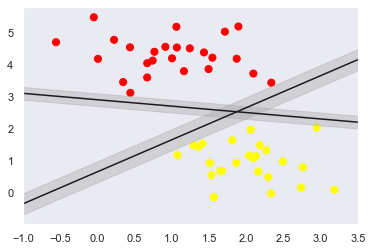

In [205]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

for m, b, d in [(1, 0.65, 0.33), (-0.2, 2.9, 0.2)]:
    yfit = m * xfit + b
    plt.plot(xfit, yfit, '-k')
    plt.fill_between(xfit, yfit - d, yfit + d, edgecolor='none',
                     color='#AAAAAA', alpha=0.4)

plt.xlim(-1, 3.5);

For the sake of simplicity, we'll only consider separating lines that lie in the middle of any given margin.

So which margin is optimal? If our goal is to separate the two classes as well as possible, then the optimal margin will be the one with the largest width! This minimizes the probability of misclassification of a new data point. 

In [206]:
from sklearn.svm import SVC # "Support vector classifier"

model = SVC(kernel="linear").fit(X, y)


In [207]:
def plot_svc_decision_function(model, ax=None, plot_support=True):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    
    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none', color='black');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

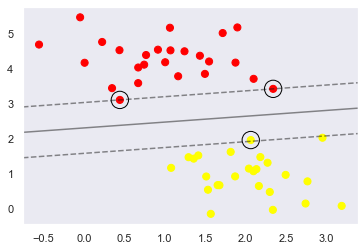

In [208]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(model);

The highlighted circles are the **support vectors**. These are the core points that the model uses to determine the separating boundary. It's important to note that *only* these support vectors are important. All other data points are effectively disregarded during training!

Below is an example of a toy dataset with additional data points outside of the previously defined margin.

In [209]:
model.support_vectors_

array([[0.44359863, 3.11530945],
       [2.33812285, 3.43116792],
       [2.06156753, 1.96918596]])

N = 60 
 [[0.44359863 3.11530945]
 [1.25566754 3.38204112]
 [0.83685684 2.13635938]]
_________________________________________
N = 120 
 [[0.44359863 3.11530945]
 [1.25566754 3.38204112]
 [0.83685684 2.13635938]]
_________________________________________


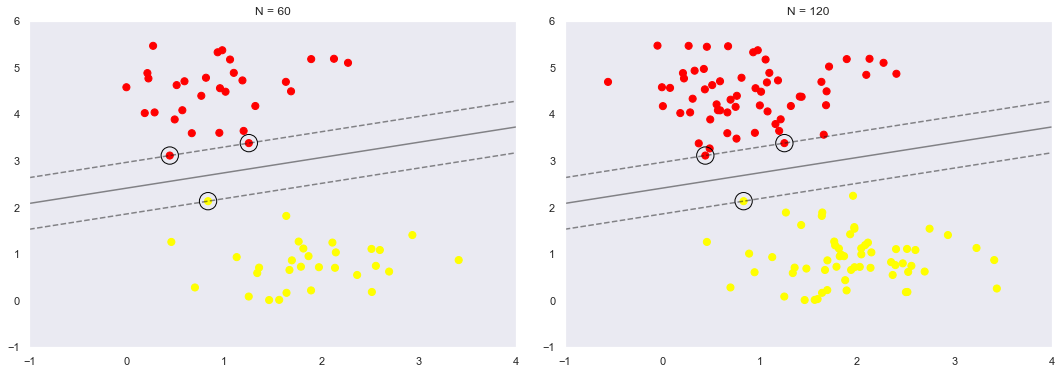

In [210]:
def plot_svm(N=10, ax=None):
    X, y = make_blobs(n_samples=200, centers=2,
                      random_state=0, cluster_std=0.60)
    X = X[:N]
    y = y[:N]
    model = SVC(kernel='linear', C=1E10)
    model.fit(X, y)
    print('N = {0} \n'.format(N), model.support_vectors_)
    print ("_________________________________________")
    
    ax = ax or plt.gca()
    ax.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
    ax.set_xlim(-1, 4)
    ax.set_ylim(-1, 6)
    plot_svc_decision_function(model, ax)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)
for axi, N in zip(ax, [60, 120]):
    plot_svm(N, axi)
    axi.set_title('N = {0}'.format(N))

We can confirm, visually and via the support vectors, that the two models are identical.

**SVMs effectively ignore all data points that aren't support vectors during training**

## Tuning the SVM: Softening the margin
What if outliers in the data affect the margin itself? Consider the data from before, but with an additional outlier inside the margin belonging to the red class (marked with an X)

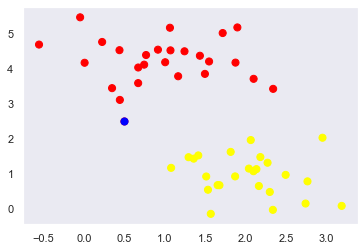

In [211]:
Xo = np.vstack((X, np.array([[0.5, 2.5]])))
yo = np.append(y, 0)

plt.scatter(Xo[:, 0], Xo[:, 1], c=yo, s=50, cmap='autumn')
plt.scatter(0.5, 2.5, c='blue', s=50, cmap='autumn')

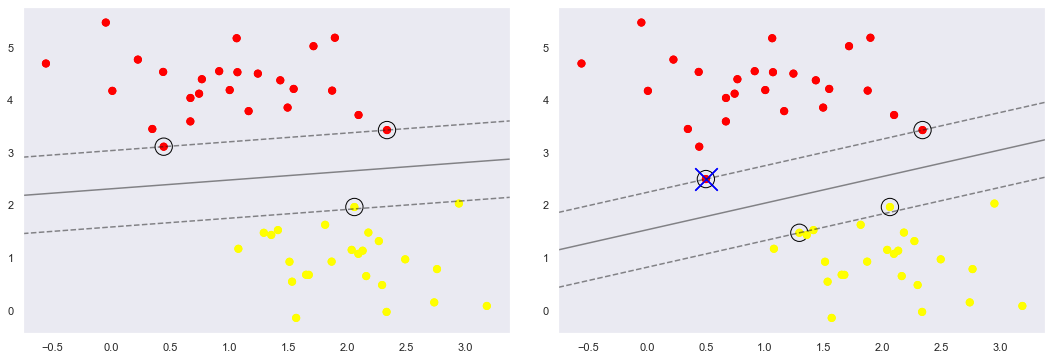

In [212]:
models = [
    SVC(kernel="linear").fit(X, y),
    SVC(kernel="linear").fit(Xo, yo)]

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

for axi, model in zip(ax, models):
    ax[0].scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
    plot_svc_decision_function(model, axi)
    axi.scatter(model.support_vectors_[:, 0],
                model.support_vectors_[:, 1],
                s=300, lw=1, facecolors='none')
    ax[1].scatter(Xo[:, 0], Xo[:, 1], c=yo, s=50, cmap='autumn')
    ax[1].scatter(0.5, 2.5, c="blue", s=500, marker="x")

Notice how a single outlier completely changes our decision boundary? This instability towards outliers close to the boundary is, obviously, an undesirable effect.

To rectify this, we introduce a tuning parameter `C`, which determines the hardness of the boundary margin. for $C \rightarrow \infty$, the margin is completely hard and tolerates absolutely no overlaps with data points. As $C$ becomes smaller, the SVM tolerates further "incursions" into the margin.

For more explanation about `C`, watch this video: 
https://www.youtube.com/watch?v=5oVQBF_p6kY

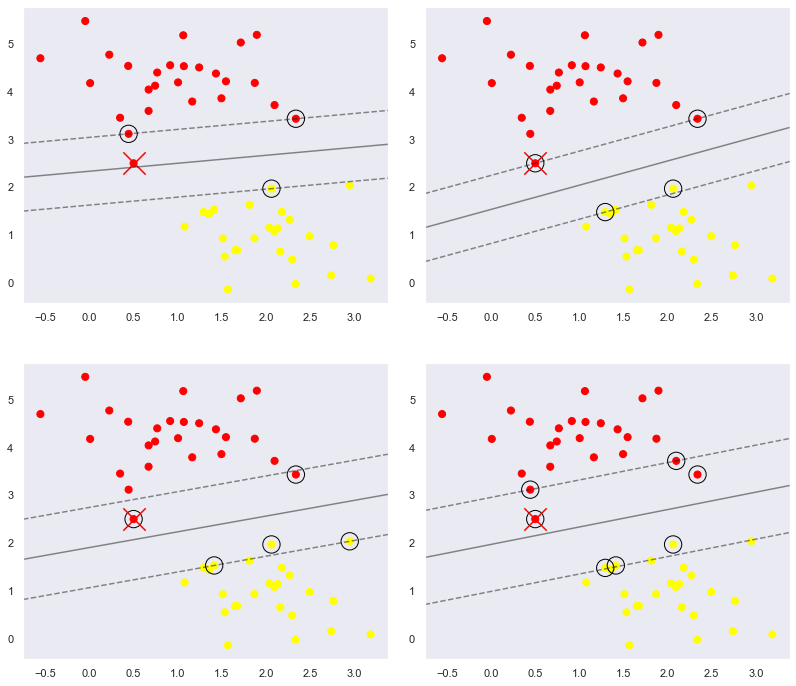

In [213]:
# C large - regularize less
# C less - regularize more

models = [
    SVC(kernel="linear", C=1e10).fit(X, y),
    SVC(kernel="linear", C=1).fit(Xo, yo),
    SVC(kernel="linear", C=0.5).fit(Xo, yo), 
    SVC(kernel="linear", C=0.25).fit(Xo, yo)]

fig, ax = plt.subplots(2, 2, figsize=(12, 12))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)
ax[0][0].scatter(Xo[:, 0], Xo[:, 1], c=yo, s=50, cmap='autumn');
ax[0][1].scatter(Xo[:, 0], Xo[:, 1], c=yo, s=50, cmap='autumn');
ax[1][0].scatter(Xo[:, 0], Xo[:, 1], c=yo, s=50, cmap='autumn');
ax[1][1].scatter(Xo[:, 0], Xo[:, 1], c=yo, s=50, cmap='autumn');
plot_svc_decision_function(models[0], ax=ax[0][0]);
plot_svc_decision_function(models[1], ax=ax[0][1]);
plot_svc_decision_function(models[2], ax=ax[1][0]);
plot_svc_decision_function(models[3], ax=ax[1][1]);

ax[0][0].scatter(0.5, 2.5, c="red", s=500, marker="x");
ax[0][1].scatter(0.5, 2.5, c="red", s=500, marker="x");
ax[1][0].scatter(0.5, 2.5, c="red", s=500, marker="x");
ax[1][1].scatter(0.5, 2.5, c="red", s=500, marker="x");

We can't exactly recreate the original separating boundary but can get close.

This softening of the boundary isn't just useful for dealing with individual outliers but also for when the data simply overlaps too strongly. For example:

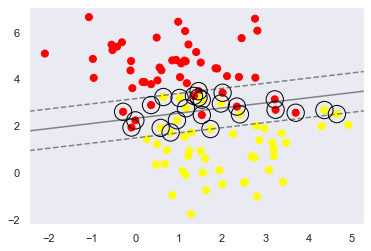

In [214]:
X, y = sklearn.datasets.samples_generator.make_blobs(
    n_samples=100, centers=2, random_state=0, cluster_std=1.2)
model = sklearn.svm.SVC(kernel="linear", C=1).fit(X, y)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn');
plot_svc_decision_function( model)

# SVM is a very computational expensive

Fun fact: Trying to train a model with a very high value for $C$ will take an exceptionally long time or even fail outright due to the algorithms inability to find an acceptable solution without overlaps.

### Non-linear kernels
A linear separating boundary is only one option we have for an SVM. Just as we can project features into higher-dimensional spaces for linear regressions, e.g. polynomial features, we can also project features into a higher-dimensional space for SVMs.

Scikit-learn lets us directly define the feature transformation in the model. This is because SVMs are special in that we don't explicitly need to calculate the transformed features; we can use mathematical tricks to do so implicitly.

Several types of kernels are available by default.

### Gaussian Radial Basis Function
The most common, and most powerful, kernel is the **Gaussian radial basis function (rbf)**. Let us consider the following data:

Model Accuracy: 0.67


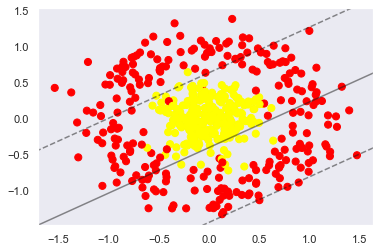

In [215]:
X, y = sklearn.datasets.samples_generator.make_circles(500, factor=0.2, noise=0.2, random_state=0)
model = sklearn.svm.SVC(kernel='linear').fit(X, y)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn');
plot_svc_decision_function(model, plot_support=False);
print("Model Accuracy: {:.2f}".format(model.score(X, y)))

There is no way we could possible separate this data linearly, no mtter how soft the margin is. We can, however, lift it into a third dimension with a radial basis function:

$$ Z(x) = e^{-\gamma \cdot \sum_i x_i^2} $$

Text(0.5, 0, 'r')

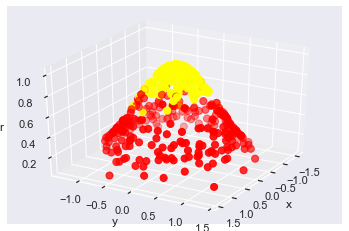

In [218]:


gamma = 1
z = np.exp(-gamma*(X ** 2).sum(1))
fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")
ax.scatter3D(X[:, 0], X[:, 1], z, c=np.array(["red", "yellow"])[y], s=50)
ax.view_init(elev=30, azim=30)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('r')

As we can see, this adds a third dimension to our data. We can now cleanly separate the data points by cutting the resulting cone.

Model Accuracy: 0.97


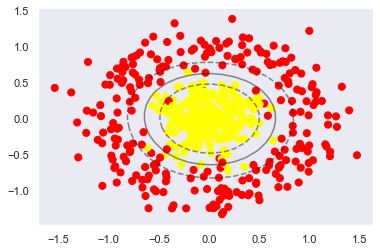

In [217]:
# kernel='rbf'
model = SVC(kernel='rbf', gamma="scale").fit(X, y)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn');
plot_svc_decision_function(model, plot_support=False);
print("Model Accuracy: {:.2f}".format(model.score(X, y)))

Intuitively, the `gamma` parameter defines how far the influence of a single training example reaches, with low values meaning ‘far’ and high values meaning ‘close’. The gamma parameters can be seen as the inverse of the radius of influence of samples selected by the model as support vectors.

For more explanation regarding `gamma` watch this video:
https://www.youtube.com/watch?v=m2a2K4lprQw

Model Accuracy: 0.98


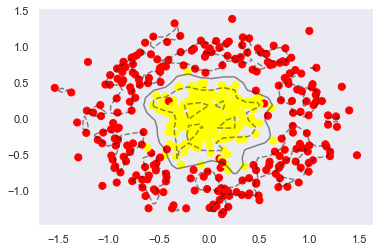

In [219]:
model = sklearn.svm.SVC(kernel='rbf', gamma=50).fit(X, y)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn');
plot_svc_decision_function(model, plot_support=False);
print("Model Accuracy: {:.2f}".format(model.score(X, y)))

### Other kernels
In most cases, the RBF kernel will be the kernel of choice. However, SVMs also natively support polynomial, sigmoidal, or even custom kernels. See the [Scikit-learn documentation for SVM Classifiers](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html) for more information.

**Exercise**

Given the data below, train support vector machines with various kernels and parameters to study the effects thereof.

You can visualize all of your results with the command (the model must be trained beforehand!)

```python
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(model, plot_support=False);
```

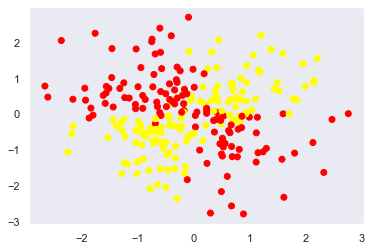

In [221]:
rng = np.random.RandomState(0)
X = rng.normal(size=(250, 2))
y = (X[:, 0] / X[:, 1] > 0).astype(int)
X += rng.normal(scale=0.2, size=(250, 2))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap="autumn")

1. Separate the data into a training and a test data set. Let the test set size fraction be 25%.
2. Train an SVM with a linear kernel with the default value for `C` and assess the performance on the test set. Plot the results.
3. Now train a model with an `rbf` kernel and assess its performance. Set `C=1` and `gamma="auto"`. Plot the results.
4. Train a model with `gamma` values of `(0.01, 0.1, 1, 10, 100)`. Assess the performance of each model and plot the results. You'll need to place each plot into a separate notebook cell due to how the `plot_svc_decision_function(...)` function is implemented.
5. Train an SVM with a `poly` kernel, `degree=2`, `gamma=100`, and `C=1`. Assess the performance and visualize the results. How does this result compare to the `rbf` kernel above?

- Separate the data into a training and a test data set. Let the test set size fraction be 25%.

In [ ]:
### Your code here

In [222]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state = 0)

- Train an SVM with a linear kernel with the default value for `C` and assess the performance on the test set. Plot the results.

In [ ]:
### Your code here

Model Accuracy: 0.62


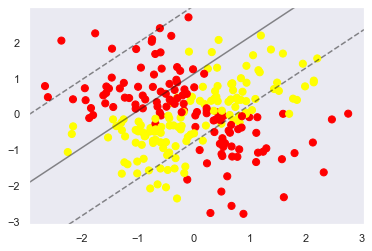

In [250]:
model = sklearn.svm.SVC(kernel='linear').fit(Xtrain, ytrain)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn');
plot_svc_decision_function(model, plot_support=False);
print("Model Accuracy: {:.2f}".format(model.score(Xtest, ytest)))

- Now train a model with an `rbf` kernel and assess its performance. Set `C=1` and `gamma="auto"`. Plot the results.

In [251]:
### Your code here

Model Accuracy: 0.84


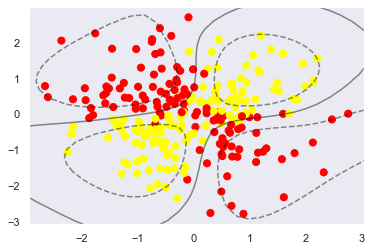

In [252]:
model = sklearn.svm.SVC(kernel='rbf', C = 1,gamma="auto").fit(Xtrain, ytrain)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn');
plot_svc_decision_function(model, plot_support=False);
print("Model Accuracy: {:.2f}".format(model.score(Xtest, ytest)))

- Train a model with `gamma` values of `(0.01, 0.1, 1, 10, 100)`. Assess the performance of each model and plot the results. You'll need to place each plot into a separate notebook cell due to how the `plot_svc_decision_function(...)` function is implemented.

In [253]:
### Your code here

Model 1 Accuracy: 0.49
Model 2 Accuracy: 0.84
Model 3 Accuracy: 0.90
Model 4 Accuracy: 0.62


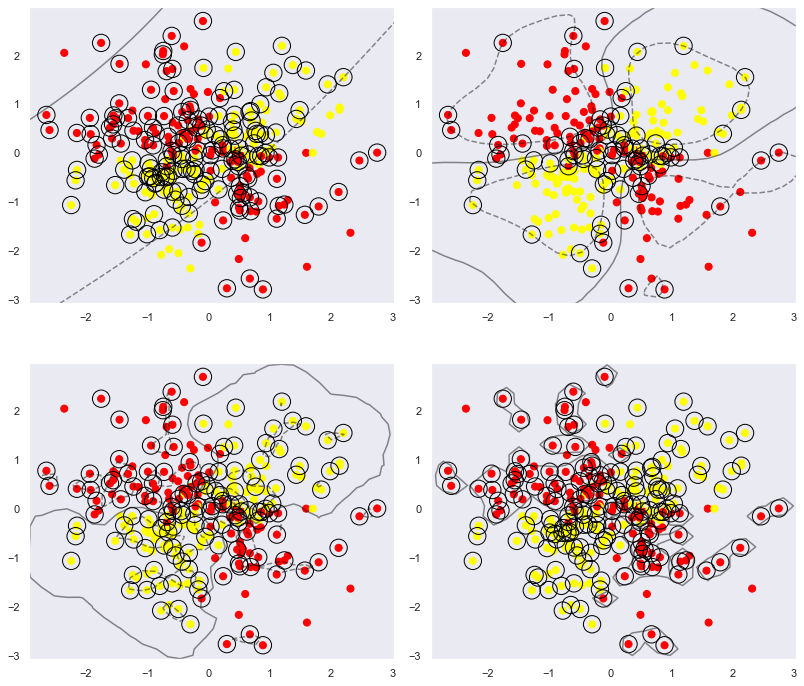

In [267]:
models = [
    SVC(kernel="rbf", C = 1, gamma=0.01).fit(Xtrain, ytrain),
    SVC(kernel="rbf", C = 1, gamma=1).fit(Xtrain, ytrain),
    SVC(kernel="rbf", C = 1, gamma=10).fit(Xtrain, ytrain), 
    SVC(kernel="rbf", C = 1, gamma=100).fit(Xtrain, ytrain)]

print("Model 1 Accuracy: {:.2f}".format(models[0].score(Xtest, ytest)))
print("Model 2 Accuracy: {:.2f}".format(models[1].score(Xtest, ytest)))
print("Model 3 Accuracy: {:.2f}".format(models[2].score(Xtest, ytest)))
print("Model 4 Accuracy: {:.2f}".format(models[3].score(Xtest, ytest)))

fig, ax = plt.subplots(2, 2, figsize=(12, 12))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)
ax[0][0].scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn');
ax[0][1].scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn');
ax[1][0].scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn');
ax[1][1].scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn');
plot_svc_decision_function(models[0], ax=ax[0][0]);
plot_svc_decision_function(models[1], ax=ax[0][1]);
plot_svc_decision_function(models[2], ax=ax[1][0]);
plot_svc_decision_function(models[3], ax=ax[1][1]);

# ax[0][0].scatter(0.5, 2.5, c="red", s=500, marker="x");
# ax[0][1].scatter(0.5, 2.5, c="red", s=500, marker="x");
# ax[1][0].scatter(0.5, 2.5, c="red", s=500, marker="x");
# ax[1][1].scatter(0.5, 2.5, c="red", s=500, marker="x");



Model Accuracy: 0.53


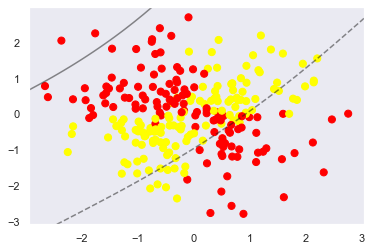

In [255]:
model = sklearn.svm.SVC(kernel='rbf', C = 1,gamma=0.01).fit(Xtrain, ytrain)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn');
plot_svc_decision_function(model, plot_support=False);
print("Model Accuracy: {:.2f}".format(model.score(Xtest, ytest)))

Model Accuracy: 0.87


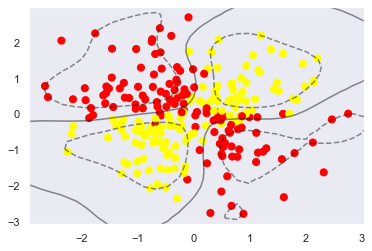

In [256]:
model = sklearn.svm.SVC(kernel='rbf', C = 1,gamma=1).fit(Xtrain, ytrain)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn');
plot_svc_decision_function(model, plot_support=False);
print("Model Accuracy: {:.2f}".format(model.score(Xtest, ytest)))

Model Accuracy: 0.90


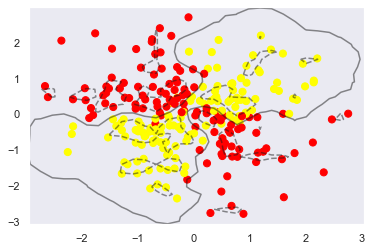

In [257]:
model = sklearn.svm.SVC(kernel='rbf', C = 1,gamma=10).fit(Xtrain, ytrain)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn');
plot_svc_decision_function(model, plot_support=False);
print("Model Accuracy: {:.2f}".format(model.score(Xtest, ytest)))

Model Accuracy: 0.62


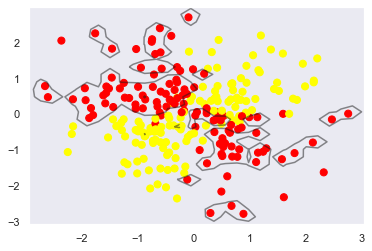

In [258]:
model = sklearn.svm.SVC(kernel='rbf', C = 1,gamma=100).fit(Xtrain, ytrain)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn');
plot_svc_decision_function(model, plot_support=False);
print("Model Accuracy: {:.2f}".format(model.score(Xtest, ytest)))

- Train an SVM with a `poly` kernel, `degree=2`, `gamma=100`, and `C=1`. Assess the performance and visualize the results. How does this result compare to the `rbf` kernel above?

In [259]:
### Your code here

Model Accuracy: 0.86


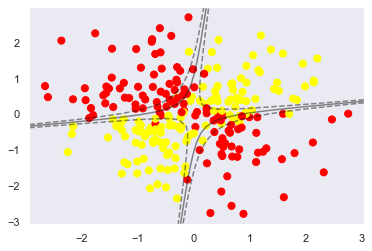

In [260]:
model = sklearn.svm.SVC(kernel='poly', C=1 ,gamma=100, degree = 2).fit(Xtrain, ytrain)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn');
plot_svc_decision_function(model, plot_support=False);
print("Model Accuracy: {:.2f}".format(model.score(Xtest, ytest)))

## Summary

Support vector machines...

- are discriminative models. That means they don't predict the probability of a data point belonging to a class but the optimal boundary between classes.
    - Optimal is defined as the boundary with the greatest distance (largest margin) to both classes.
    - We *can* compute the probability distributions for data, but this increases the required computational time.

- depend only on a few support vectors to perform a classification, making them very fast when compared to other algorithms.
    - This also makes them good at dealing with high-dimensional data as the required computation time scales much more slowly than if the whole dataset were used.
- are very robust towards outliers far away from the class boundary.
- can be made semi-robust towards outliers at the class boundary with softer margins.
- can be adapted with kernels to allow for arbitrary class boundary shapes
- typically only have two parameters to tune, $C$ and $\gamma$.
- trained with linear kernels are extremely easy to interpret.

However, it is important to keep in mind than

- finding support vectors still requires a comprehensive search of the data, meaning they can be slow to train on large data sets.
    - In addition, parameters $C$ and $\gamma$ must be tuned via cross validation, increasing the training time substantially.
- can only deal with binary problems natively. To extend them to multi-class problems, multiple SVMs are trained and treated as an ensemble $\rightarrow$ increased training time

## More Readings:

Distance:

- http://www.cs.ucc.ie/~dgb/courses/tai/notes/handout4.pdf

Decision Tree:

- https://medium.com/machine-learning-101/chapter-3-decision-trees-theory-e7398adac567

Logistic Regression:

- https://www.coursera.org/lecture/machine-learning/classification-wlPeP

- https://www.coursera.org/lecture/machine-learning/decision-boundary-WuL1H

- https://www.coursera.org/lecture/ml-classification/intuition-behind-linear-classifiers-lCBwS

- https://www.youtube.com/watch?v=l-EhAIp31HA

- https://www.youtube.com/watch?v=Q81RR3yKn30

- https://www.coursera.org/lecture/machine-learning/regularized-logistic-regression-4BHEy

Support Vector Machine (SVM):

- Bacis Friendly Introduction: https://www.youtube.com/watch?v=N1vOgolbjSc

- Bacis Friendly Introduction: https://www.youtube.com/watch?v=Y6RRHw9uN9o

- Kernels (Advanced): https://www.coursera.org/lecture/machine-learning/kernels-i-YOMHn

- Set `C`: https://www.youtube.com/watch?v=5oVQBF_p6kY

- Set `gamma`: https://www.youtube.com/watch?v=m2a2K4lprQw